In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
# Import mpl to change the plot configurations using rcParams.
#import matplotlib as mpl

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
# Get the unique values of the type of city.
pyber_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
# Get the  total number of drivers for urban, suburban and rural cities.
total_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
# Get the  total number of rides for urban, suburban and rural cities.
total_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [9]:
# Get the  total fares for urban, suburban and rural cities.
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [10]:
# Get the  average fares per ride for urban, suburban and rural cities.
avg_fare_ride = total_fares/total_ride_count
avg_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [11]:
# Get the  average fares per driver for urban, suburban and rural cities.
avg_fare_driver = total_fares/total_driver_count
avg_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [12]:
# Adding a list of values with keys to create a new DataFrame.

per_citytype_summary_df = pd.DataFrame({
             "Total Rides": total_ride_count,
             "Total Drivers": total_driver_count,
             "Total Fares": total_fares,
             "Average Fare per Ride": avg_fare_ride,
           "Average Fare per Driver": avg_fare_driver})
per_citytype_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [13]:
# Remove the index name from the DataFrame.
per_citytype_summary_df.index.name = None
per_citytype_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [14]:
# Format the columns in the DataFrame.
per_citytype_summary_df["Total Rides"] = per_citytype_summary_df["Total Rides"].map("{:,}".format)
per_citytype_summary_df["Total Drivers"] = per_citytype_summary_df["Total Drivers"].map("{:,}".format)
per_citytype_summary_df["Total Fares"] = per_citytype_summary_df["Total Fares"].map("${:,.2f}".format)
per_citytype_summary_df["Average Fare per Ride"] = per_citytype_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
per_citytype_summary_df["Average Fare per Driver"] = per_citytype_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
per_citytype_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [15]:
# Combine the data into a single dataset
pyber_complete_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_complete_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
# Rename columns of the merged DataFrame.
pyber_complete_data_df.rename(columns ={'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}, inplace = True)

# Display the DataFrame
pyber_complete_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# Check the datatype of the columns.
pyber_complete_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         2375 non-null   object 
 1   Date         2375 non-null   object 
 2   Fare         2375 non-null   float64
 3   Ride Id      2375 non-null   int64  
 4   No. Drivers  2375 non-null   int64  
 5   City Type    2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [18]:
# Convert the date columns to date type
pyber_complete_data_df.Date =pd.to_datetime(pyber_complete_data_df.Date)
pyber_complete_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
# Set the index to the Date column
pyber_complete_data_df.set_index ('Date', inplace = True)
pyber_complete_data_df.index.name = None
pyber_complete_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [20]:
# Create a copy of the merged dataframe
pyber_copy_data_df = pyber_complete_data_df[['City Type', 'Fare']].copy()
pyber_copy_data_df

,City Type,Fare
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11
2019-05-07 19:22:15,Rural,44.94


In [21]:
pyber_copy_data_df.index.name = 'Date'
pyber_copy_data_df

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58
...,...,...
2019-04-29 17:04:39,Rural,13.38
2019-01-30 00:05:47,Rural,20.76
2019-02-10 21:03:50,Rural,11.11


In [22]:
# Calulate the total fares per city on a particular date and reset the index
pyber_total_fare_df = pyber_copy_data_df.groupby(['City Type','Date'])['Fare'].sum().reset_index()
print (pyber_total_fare_df)

     City Type                Date   Fare
0        Rural 2019-01-01 09:45:36  43.69
1        Rural 2019-01-02 11:18:32  52.12
2        Rural 2019-01-03 19:51:01  19.90
3        Rural 2019-01-04 03:31:26  24.88
4        Rural 2019-01-06 07:38:40  47.33
...        ...                 ...    ...
2370     Urban 2019-05-08 04:20:00  21.99
2371     Urban 2019-05-08 04:39:49  18.45
2372     Urban 2019-05-08 07:29:01  18.55
2373     Urban 2019-05-08 11:38:35  19.77
2374     Urban 2019-05-08 13:10:18  18.04

[2375 rows x 3 columns]


In [23]:
# create pivot table 
pyber_pivot_df= pyber_total_fare_df.pivot_table(index="Date", columns = 'City Type')
pyber_pivot_df

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [24]:
# Create a new DataFrame for the date range '2019-01-01':'2019-04-28'
pyber_daterange_df = pyber_pivot_df.loc['2019-01-01':'2019-04-28', :]
pyber_daterange_df

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [25]:
#Resample the data for the date range Jan 1st 2019 till Apr 28th 2019 on weekly basis and find the sum of the fare.
pyber_weekly_fare = pyber_daterange_df['Fare'].resample('w').sum()
pyber_weekly_fare

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


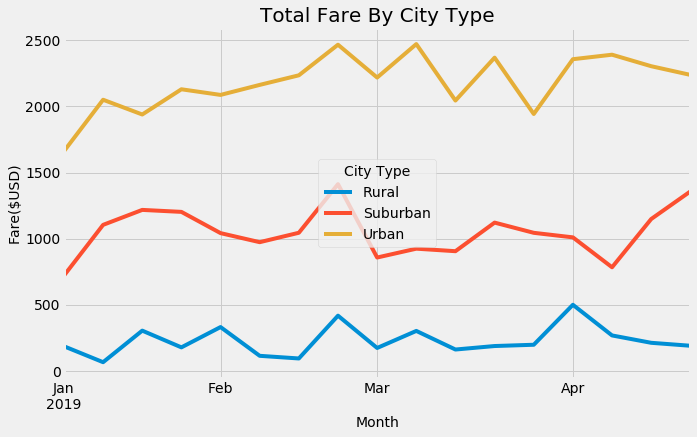

In [26]:
#Plot the line chart for the total fare per city type 
plt.style.use('fivethirtyeight')
fare_plot = pyber_weekly_fare.plot( figsize=(10, 6))
fare_plot.set_title('Total Fare By City Type',fontsize=20)
fare_plot.set_ylabel('Fare($USD)',fontsize=14)
fare_plot.set_xlabel("Month",fontsize=14)
# Save the figure.
plt.savefig("analysis/Fig8.png")
plt.show()